# Zadatak 1
U prilogu vježbe nalazi se funkcija 6.1. koja služi za generiranje umjetnih podataka kako bi se demonstrirala binarna
klasifikacija za slučaj dvije ulazne veličine. Funkcija prima cijeli broj koji definira željeni broju uzoraka u skupu, a
vraća generirani skup podataka u obliku numpy polja pri čemu su prvi i drugi stupac ulazne veličine, a treći stupac klasa
kojoj pojedini uzorak pripada. Pomoću ove funkcije generirajte skup za učenje veličine 200 uzoraka (pri tome koristite
postavite seed generatora slučajnih brojeva na 242 pomoću naredbe np.random.seed(242)). Generirajte i skup za testiranje veličine 100 uzoraka uzoraka (pri tome koristite postavite seed generatora slučajnih brojeva na 242 pomoću
naredbe np.random.seed(12)). Uključite numpy biblioteku

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
 
def generate_data(n):
    
    #prva klasa
    n1 = n//2
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = n - n//2
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data


In [ ]:
trainData = 200
testData = 100
np.random.seed(242)
randomTrainData = generate_data(trainData)

np.random.seed(12)
randomTestData = generate_data(testData)

# Zadatak 2
Prikažite generirane podatke za učenje pomoću matplotlib biblioteke u ravnini 𝑥1 − 𝑥2
. Kako bi se dvije klase
razlikovale, potrebno ih je obojati drugom bojom. Za ovaj zadatak vam može poslužiti naredba scatter koja osim
podataka prima i parametre c i cmap kojima je moguće definirati boju svake klase.


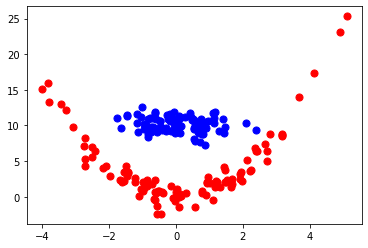

In [ ]:
for i in range (0,len(randomTrainData)):
    if(randomTrainData[i,2]<1):
        color= 'red'
        plt.scatter(randomTrainData[i,0],randomTrainData[i,1],s=50,c=color)
    else:
        color= 'blue'
        plt.scatter(randomTrainData[i,0],randomTrainData[i,1],s=50,c=color)

# Zadatak 3
Izgradite model logističke regresije pomoću scikit-learn biblioteke na temelju generiranih podataka za učenje. Koristite
metodu LogisticRegression() iz biblioteke sklearn.linear_model. Kao i sve metode strojnog učenja unutar ove
biblioteke, objekt klase logistička regresija ima na raspolaganju metode fit (određivanje parametara modela 𝛉) i predict
(klasifikacija uzoraka na temelju vrijednosti ulaznih veličina). Izgrađeni model sadrži parametre 𝛉 u varijablama
intercept_ i coef_. Prikažite granicu odluke naučenog modela ravnini 𝑥1 −𝑥2 zajedno s podacima za učenje. Što
primjećujete?
Napomena: granica odluke u ravnini 𝑥1 − 𝑥2 definirana je kao krivulja: 𝜃0 + 𝜃1𝑥1 + 𝜃1𝑥2 = 0

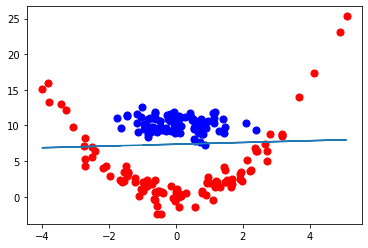

In [ ]:
X_train = randomTrainData[:,:-1]
Y_train = randomTrainData[:,-1]

X_test=randomTestData[:,:-1]
Y_test= randomTestData[:,-1]
LogRegModel = LogisticRegression()

LogRegModel.fit(X_train,Y_train)

param = list(LogRegModel.coef_[0])
param.append(LogRegModel.intercept_[0])

x1= [x1 for x1 in X_train[:,0]]
x2 = [- param[2] / param[1] - param[0] * x1 / param[1] for x1 in X_train[:, 0]]
for i in range (0,len(randomTrainData)):
    if(randomTrainData[i,2]<1):
        color= 'red'
        plt.scatter(randomTrainData[i,0],randomTrainData[i,1],s=50,c=color)
    else:
        color= 'blue'
        plt.scatter(randomTrainData[i,0],randomTrainData[i,1],s=50,c=color)
        
plt.plot(x1,x2)

Kako bi pravilno logistička regresija odredila klasu potrebno je proširiti polinomno s stupnjem 2


# Zadatak 4
U prilogu vježbe nalazi se kod 6.2. koji će obojati sliku s obzirom na izlaz modela logističke regresije u obliku
vjerojatnosti (6-6). Iskoristite ovaj kod kako biste prikazali izlaz logističke regresije u obliku vjerojatnosti zajedno s
podacima za učenje.
Napomena: objekt naziva LogRegModel u kodu je model logističke regresije te ga zamijenite s odgovarajućim imenom vašeg
modela. 

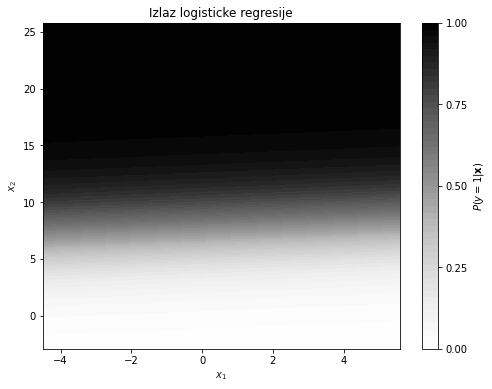

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(randomTrainData[:,0])-0.5:max(randomTrainData[:,0])+0.5:.05,
 min(randomTrainData[:,1])-0.5:max(randomTrainData[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = LogRegModel.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


# Zadatak 5
Provedite klasifikaciju testnog skupa podataka pomoću izgrađenog modela logističke regresije i metode predict.
Prikažite skup za testiranje u ravnini 𝑥1 − 𝑥2
. Zelenom bojom označite dobro klasificirane uzorke dok pogrešno
klasificirane uzorke označite crnom bojom

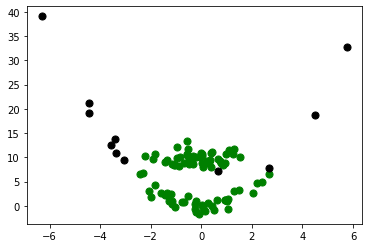

In [ ]:
y_predicted = LogRegModel.predict(X_test)

plt.figure()
for i in range(0,len(y_predicted)):
    if(y_predicted[i] == Y_test[i]):
        color = 'green'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color)
    elif(y_predicted[i] != Y_test[i]):
        color= 'black'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color)



# Zadatak 6
Funkcija 5.3. u dodatku prima izračunatu matricu zabune pri čemu se klase označavaju brojevima 0-9. Prikažite pomoću
ove funkcije matricu zabune izgrađenog modela logističke regresije na testnim podacima. Matricu zabune moguće je
izračunati naredbom confusion_matrix koja se nalazi u sklearn.metrics. Izračunajte i pokazatelje dane izrazima (6-10)
(napišite vlastitu funkciju ili koristite gotove iz sklearn.metrics).


Accuracy=  0.89
Missclasification rate=  0.10999999999999999
Precision=  0.8
Sensitivity=  0.975609756097561
Specificity=  0.8305084745762712


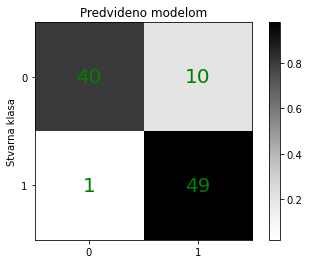

In [ ]:
def plot_confusion_matrix(c_matrix):

 norm_conf = []
 for i in c_matrix:
     a = 0
     tmp_arr = []
     a = sum(i, 0)
     for j in i:
         tmp_arr.append(float(j)/float(a))
     norm_conf.append(tmp_arr)
 fig = plt.figure()
 ax = fig.add_subplot(111)
 res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')
 width = len(c_matrix)
 height = len(c_matrix[0])
 for x in range(width):
     for y in range(height):
         ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center', color = 'green', size = 20)
 fig.colorbar(res)
 numbers = '0123456789'
 plt.xticks(range(width), numbers[:width])
 plt.yticks(range(height), numbers[:height])

 plt.ylabel('Stvarna klasa')
 plt.title('Predvideno modelom')
 plt.show()

confMatrix = confusion_matrix(Y_test, y_predicted)

print("Accuracy= ",(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Missclasification rate= ",1-(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Precision= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1]))
print("Sensitivity= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[1,0]))
print("Specificity= ",confMatrix[1,1]/(confMatrix[1,1]+confMatrix[0,1]))
plot_confusion_matrix(confMatrix)



# Zadatak 7
Ponovite zadatke 3,4,5,6 za slučaj kada se u model logističke regresije proširuje s dodatnim ulaznim veličinama koje su
polinomska transformacija postojećih. Prošireni skup ulaznih veličina (data_train_new) veličine moguće je dobiti iz
osnovnog skupa za učenje (data_train) naredbama:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias = False)
data_train_new = poly.fit_transform(data_train[:,0:2])
pri čemu je degree cijeli broj koji označava do kojeg reda će se raditi proširenje skupa. Npr. za degree = 2 prošireni
skup ima uzorke oblika (6-8). Što primjećujete? Kako komentirate dobivene rezultate? Što se događa kada mijenjate
degree od malih prema većim vrijednostima?

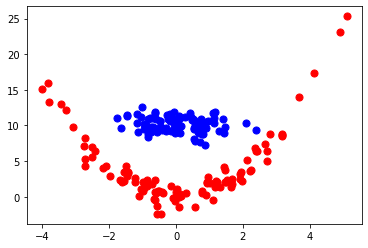

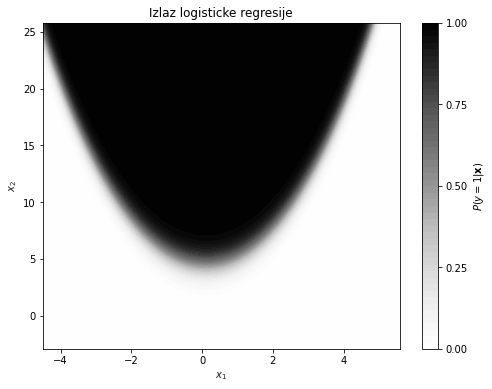

Accuracy=  1.0
Missclasification rate=  0.0
Precision=  1.0
Sensitivity=  1.0
Specificity=  1.0


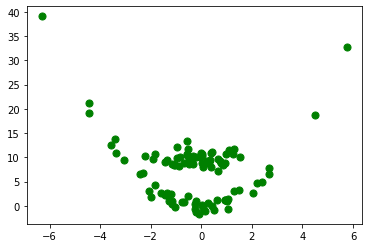

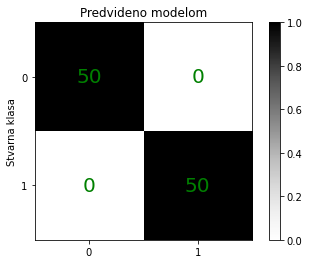

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias = False)
X_train = poly.fit_transform(randomTrainData[:,0:2])
Y_train = randomTrainData[:,-1]


X_test= poly.fit_transform(randomTestData[:,0:2])
Y_test= randomTestData[:,-1]

LogRegModel = LogisticRegression(max_iter = 500)
LogRegModel.fit(X_train,Y_train)

param = list(LogRegModel.coef_[0])
param.append(LogRegModel.intercept_[0])

for i in range (0,len(randomTrainData)):
    if(randomTrainData[i,2]<1):
        color= 'red'
        plt.scatter(X_train[i,0],X_train[i,1],s=50,c=color)
    elif(randomTrainData[i,2]>=0):
        color= 'blue'
        plt.scatter(X_train[i,0],X_train[i,1],s=50,c=color)
        

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(randomTrainData[:,0])-0.5:max(randomTrainData[:,0])+0.5:.05,
 min(randomTrainData[:,1])-0.5:max(randomTrainData[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid = poly.fit_transform(grid)
probs = LogRegModel.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)
ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()

y_predicted = LogRegModel.predict(X_test)

plt.figure()
for i in range(0,len(y_predicted)):
    if(y_predicted[i] == Y_test[i]):
        color = 'green'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color)
    elif(y_predicted[i] != Y_test[i]):
        color= 'black'
        plt.scatter(X_test[i,0],X_test[i,1],s=50,c=color)

confMatrix = confusion_matrix(Y_test, y_predicted)
print("Accuracy= ",(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Missclasification rate= ",1-(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Precision= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1]))
print("Sensitivity= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[1,0]))
print("Specificity= ",confMatrix[1,1]/(confMatrix[1,1]+confMatrix[0,1]))

plot_confusion_matrix(confMatrix)


Koristeći stupanj polinoma 2 model je točno predvidio sve test vrijednosi 

# Zadatak 7
Na temelju podataka za učenje izgradite model metodom K najbližih susjeda. Ulazne veličine je potrebno standardizirati
prije postupka učenja modela naredbom preprocessing.scale(X) gdje je matrica X matrica ulaznih veličina (učitajte
naredbu pomoću from sklearn import preprocessing). Granicu odluke ovog modela prikažite pomoću funkcije 6.4. iz
dodatka koja za argumente ima model K najbližih susjeda, matricu ulaznih veličina i vektor izlazne veličine. Što
primjećujete? Kako se granica mijenja ako se broj susjeda povećava/smanjuje? Što se događa ako isključite
standardizaciju podataka? Prikažite matricu zabune izgrađenog modela na testnim podacima

Accuracy=  1.0
Missclasification rate=  0.0
Precision=  1.0
Sensitivity=  1.0
Specificity=  1.0


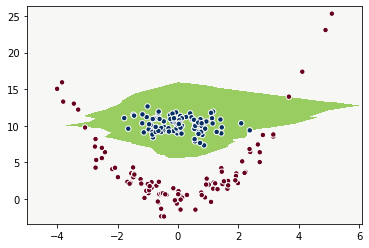

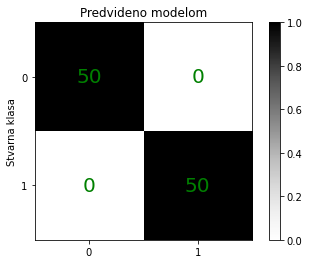

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
def plot_KNN(KNN_model, X, y):

 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
 np.arange(x2_min, x2_max, 0.01))

 Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
 Z = Z1.reshape(xx.shape)
 plt.figure()
 plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
 plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu', edgecolor='white', label = 'train')


X_train = randomTrainData[:,:-1]
Y_train = randomTrainData[:,-1]

X_test=randomTestData[:,:-1]
Y_test= randomTestData[:,-1]


neighbours= KNeighborsClassifier(3)
neighbours.fit(X_train,Y_train)
plot_KNN(neighbours, X_train, Y_train)

y_predicted = neighbours.predict(X_test)
confMatrix = confusion_matrix(Y_test, y_predicted)
print("Accuracy= ",(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Missclasification rate= ",1-(confMatrix[0,0]+confMatrix[1,1])/(confMatrix[0,0]+confMatrix[0,1]+confMatrix[1,0]+confMatrix[1,1]))
print("Precision= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[0,1]))
print("Sensitivity= ",confMatrix[0,0]/(confMatrix[0,0]+confMatrix[1,0]))
print("Specificity= ",confMatrix[1,1]/(confMatrix[1,1]+confMatrix[0,1]))

plot_confusion_matrix(confMatrix)


Isključenjem szandardizacije vrijeme izvođenja algoritma se znatno povećava, ali i preciznost 